/Users/danis/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:55: UserWarning: No contour levels were found within the data range.


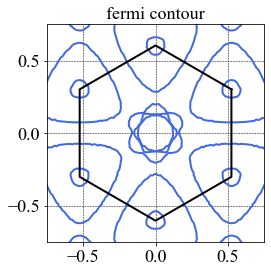

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as ml
from scipy import interpolate
from collections import OrderedDict

ef=    0.152000
b1 = np.array([1.814253, 0.000000])
b2 = np.array([0.907126, 1.571189])
bz_points=np.array([[0.907, 0.523],[0, 1.0473], [-0.907,  0.523],[-0.907, -0.523],[0, -1.0473],[0.907, -0.523],[0.907, 0.523]])


points = np.loadtxt('fe3gete2_up-kslice-coord.dat')
# Avoid numerical noise
points_x=np.around(points[:,0],decimals=10)
points_y=np.around(points[:,1],decimals=10)
num_pt=len(points)

area=   45.608550

points_x -= 2*(b1[0]+b2[0])
points_y -= 2*(b1[1]+b2[1])

points_x = points_x/1.7328
points_y = points_y/1.7328
bz_points = bz_points/1.7328


xmin=np.min(points_x)
ymin=np.min(points_y)
xmax=np.max(points_x)
ymax=np.max(points_y)

a=np.max(np.array([xmax-xmin,ymax-ymin]))
num_int=int(round(np.sqrt(num_pt*a**2/area)))
xint = np.linspace(xmin,xmin+a,num_int)
yint = np.linspace(ymin,ymin+a,num_int)

bands=np.loadtxt('fe3gete2_up-kslice-bands.dat')
numbands=bands.size//num_pt

bbands=bands.reshape((num_pt,numbands))
bandint=[]
grid_x, grid_y = np.meshgrid(xint,yint)


plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
for i in range(numbands):
    bandint.append(interpolate.griddata((points_x,points_y), bbands[:,i], (grid_x,grid_y), method='nearest'))
    im = ax.contour(grid_x,grid_y,bandint[i],[ef],colors='royalblue',linewidths=2)
    
    
    

ax.set_xlim([-0.75, 0.75])
ax.set_ylim([-0.75, 0.75])
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
plt.title('fermi contour',fontsize=18)
plt.plot(bz_points[:,0], bz_points[:,1], c='k', linewidth=2)
im = ax.grid(color='black', linestyle='dashed', linewidth=0.5)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
im = ax.set_aspect('equal')

fig.savefig('up.png', dpi=300)


